## Биомедицинские нанотехнологии и компьютерное зрение (Computer Vision)
<br>

### 1. Фильтрация и преобразование изображений

In [1]:
# Image Processing - OpenCV
# https://docs.opencv.org/3.4/d9/df8/tutorial_root.html

<div align='justify'>В настоящее время известно, что современные компьютеры и смартфоны способны сохранять изображения в виде цифровой информации. 
Каждое изображение состоит из дискретного количества пикселей, имеющих конечный диапазон значений.
Распространенные на сегодняшний день камеры могут снимать изображение с разрешением в несколько тысяч пикселей как по 
вертикали, так и по горизонтали. Пиксель содержит одно значение, представляющее уровень интенсивности или три значения цвета в случае цветного изображения.
</div>

<img width='100%' src='img/micro_rgb.png'>

<div align='justify'>В Python существует множество вариантов загрузки изображения. Можно использоват, например, библиотеку PIL (Python Image Library) или библиотеку imageio. Для обработки изображений можно воспользоваться специальными пакетами, как, например, библиотека OpenCV. При обработке данных цифровое изображение можно представить в виде матрицы или тензора. Используя математический аппарат, можно реализовать фильтрацию и трансформацию изображений. Очень часто фильтрация позволяет улучшить качество изображения, что позволяет сделать его более информативным. Например, можно улучшить контуры объекта, определить количество структурных элементов или рассчитать геометрические размеры. Далее будут рассмотрены примеры загрузки изображений в программу на Python и его преобразование.</div>

### 1.1. Загрузка изображения и цветовые модели

<div align='justify'>Для загрузки изображения в программу на Python можно использовать метод imread из библиотеки OpenCV. Достаточно указать один атрибут для данного метода, который указывает на местонахождение файла на компьютере. Рекомендуется использовать относительный путь к файлу. Важным моментом является цветовая модель, в которой было сохранено изображение. Существует множество моделей, мы будем рассматривать основные из них: BGR, RGB, GRAY, HSV и HLS. Наиболее известным форматом является RGB, который кодирует цвет в виде трех каналов (красный, зеленый и синий). Для преобразования из одной модели в другую используют специальный метод cvtColor. Ниже представлены примеры преобразования изображения в разные цветовые схемы. Обратите внимание, что по умолчанию OpenCV использует именно модель BGR. Для нормального отображения потребуется преобразовать объект в другую модель. Следующая программа показывает, как можно открыть и визуализировать изображение с помощью специальных библиотек.</div>

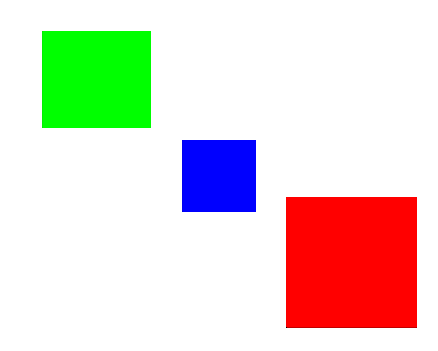

In [2]:
# Импорт библиотек для работы с изображениями
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Загрузка и чтение изображения из заданной директории
img = cv.imread('data/lab_1/squares_rgb.png') 

# Конвертация из BGR в RGB цветовую модель
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Преобразование из BGR в RGB

# Визуализация с помощью библиотеки PIL
display(Image.fromarray(img))

<div align='justify'>В примере мы показываем использование цветовой схемы RGB. Библиотека OpenCV позволяет разделить изображение на три цветовых канала: красный, синий и зелёный. Давайте посмотрим на примере загруженного изображения, как будет выглядить изображение, если мы будем использовать только отдельные каналы.</div>

<img width='90%' src='img/channels.png'>

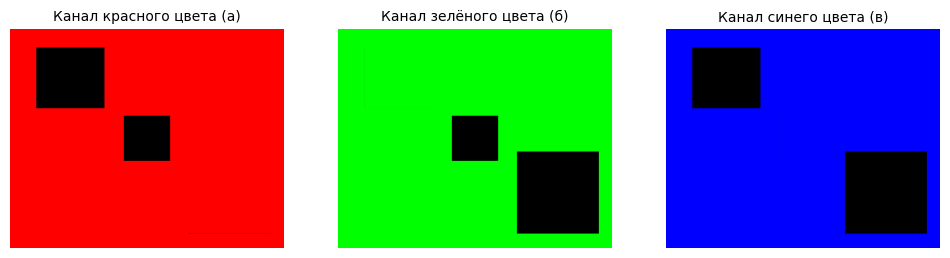

In [3]:
# Извлечение конкретного цветового канала в numpy
# B = img[:, :, 0]
# G = img[:, :, 1]
# R = img[:, :, 2]

# Выполним разделение изображения на 3 канала
img_r, img_g, img_b = cv.split(img_rgb)

# Создание нулевой матрицы для зануления канала
zeros = np.zeros(img.shape[:2], dtype = "uint8")

# Выполним объединение трёх каналов
b = cv.merge([zeros, zeros, img_r])
g = cv.merge([zeros, img_g, zeros])
r = cv.merge([img_b, zeros, zeros]) 

fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 3, 1)
ax.set_title('Канал красного цвета (а)', size=10)
ax.imshow(r)
ax.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.set_title('Канал зелёного цвета (б)', size=10)
ax.imshow(g)
ax.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.set_title('Канал синего цвета (в)', size=10)
ax.imshow(b)
ax.axis('off')

plt.show()

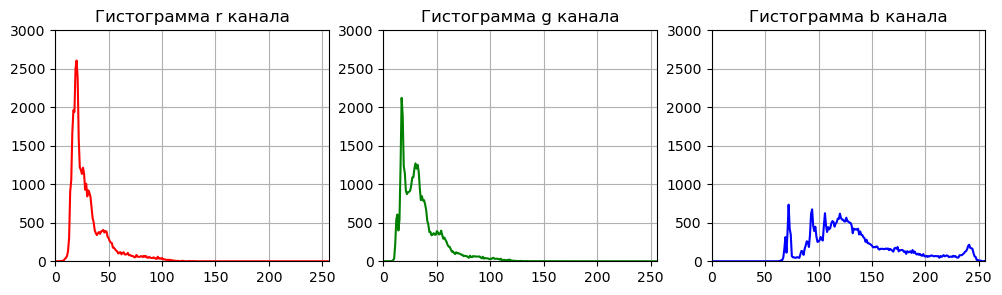

In [4]:
img_hist = cv.imread('data/lab_1/vessel.jpg')
color = ('r','g','b')

fig = plt.figure(figsize=(12, 3))

for i, col in enumerate(color):
    ax = fig.add_subplot(1, 3, i+1)
    histr = cv.calcHist([img_hist], [i], None, [256], [0, 256])
    plt.title(f'Гистограмма {col} канала')
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])
    plt.grid()
plt.show()

<div align='justify'>Для разделения на три цветовых канала нашего изображения, мы использовали специальный метод split(). Для объединения каналов использован метод merge(). На самом деле, если бы мы визуализировали отдельный канал, то должны были получить каждое изображение в оттенках серого, что не позволило бы увидеть нам цветовой канал. Для визуализации канала был использован подход, при котором мы создали нулевую матрицу и полностью занулили соответствующие каналы, оставив только тот, который нам интересен. Попробуйте поэкспериментировать и использовать смешивание каналов. Например, для получения RG схемы можно занулить канал голубого цвета и оставить без изменений канал красного и зелёного цвета, используя ранее полученную нулевую матрицу. Далее мы рассмотрим использование других цветовых схем: GRAY, HSV и HLS.</div> 

In [5]:
# Визуализация разных цветовых моделей изображения
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Преобразование из BGR в GRAY
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)    # Преобразование из BGR в HSV
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)    # Преобразование из BGR в HLS

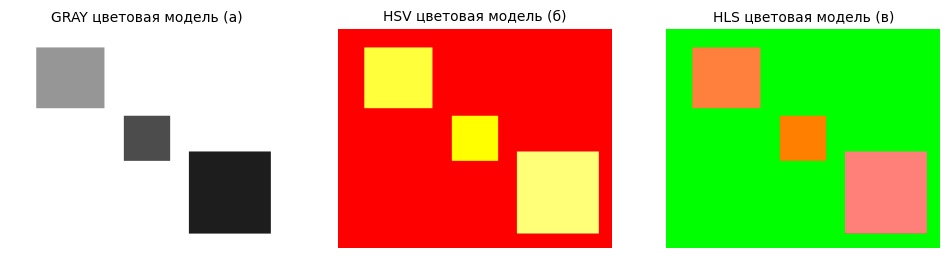

In [6]:
# Визуализация сосудистой системы с помощью библиотеки matplotlib

img = img[:,:,::-1]
img_hsv = img_hsv[:,:,::-1]
img_hls = img_hls[:,:,::-1]

fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 3, 1)
ax.set_title('GRAY цветовая модель (а)', size=10)
ax.imshow(img_gray, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.set_title('HSV цветовая модель (б)', size=10)
ax.imshow(img_hsv)
ax.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.set_title('HLS цветовая модель (в)', size=10)
ax.imshow(img_hls)
ax.axis('off')

plt.show()

<div align='justify'>Используя разные цветовые схемы, можно выделить некоторые локальные особенности на изображении. Например, контрастировать отдельные элементы изображения, что позволит определить их особенности. Данный подход позволяет определять геометрические размеры объекта, определять кол-во элементов на изображении и выполнять другие полезные процедуры.</div> 

### Задание для самостоятельной работы.

1. Разделить изображение снимка кровеносных сосудов на три цветовых канала в схеме RGB и выделить локальные особенности на изображении. Используйте изображение vessel.jpg.

2. Представить изображение снимка кровеносных сосудов в разных цветовых схемах. Используйте модель BGR, RGB, GRAY и HSV и HLS.

3. Сделайте выводы об использовании различных цветовых схем для анализа изображений. Перчислите возможные области применения цветового анализа цифровых изображений, например, в медицинской физики.

### 1.2. Фильтрация изображений

In [7]:
# Image Filtering - OpenCV
# https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

<div align='justify'>Фильтрация изображения являются действием, которое направлено на его изменение и улучшение. Процедура фильтрации позволит использовать изображения для выполнения других задач в области компьютерного зрения, либо для извлечения полезной информации. Фильтры могут выполнять разнообразные функции, включая устранение шума на фотографии, выделение контуров объектов, размытие картинки, удаление нежелательных элементов и так далее. В дальнейшем мы изучим конкретные примеры использования фильтров и увидим результаты их применения.<br><br>
Использование методов фильтрации становится необходимым из-за различных факторов, например, возникновению шума на фотографии или внесению ненужных данных на изображение. При съемке в солнечный день на снимке могут появиться слишком яркие или темные участки. В неподходящих условиях освещения, таких как ночь, фотография, полученная с камеры, может быть сильно зашумлена. Кроме того, если на изображении присутствуют нежелательные объекты или цвета, они также считаются частью шума.<br><br>
Далее рассмотрим пример загрузки изображения и выделение участка. Для преобразовани цветовой схемы используем метод cvtColor(). Выделение части изображения выполняется на основе срезов. Используем изображение vessel.jpg.
</div>

In [8]:
import matplotlib.patches as patches

# Загрузка и чтение изображения из заданной директории
img = cv.imread('data/lab_1/vessel.jpg') 

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)              # Преобразование из BGR в RGB
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)        # Преобразование из BGR в GRAY

img_gray_m20 = img_gray[190:200, 190:200]                   # Срез исходного массива 10x10
img_gray_m50 = img_gray[0:50, 0:50]                         # Срез исходного массива 50x50

print('Размер изображения: ', img.shape)

Размер изображения:  (200, 200, 3)


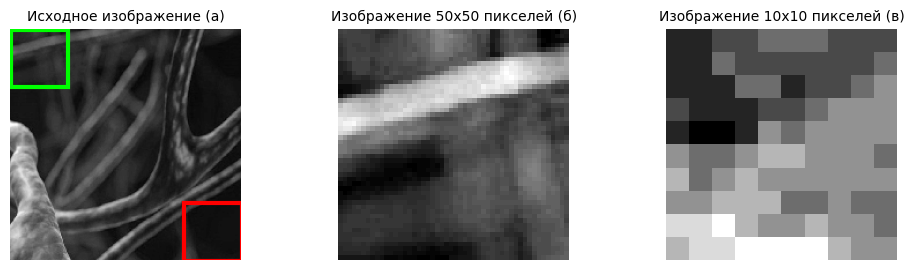

In [9]:
# Визуализация изображений
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 3, 1)
ax.set_title('Исходное изображение (а)', size=10)
ax.imshow(img_gray, cmap='gray')

rect = patches.Rectangle((0, 0), 50, 50, linewidth=3,
                         edgecolor='lime', facecolor="none", label='Label')
ax.add_patch(rect)
rect = patches.Rectangle((150, 150), 50, 50, linewidth=3,
                         edgecolor='red', facecolor="none")
ax.add_patch(rect)
ax.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.set_title('Изображение 50x50 пикселей (б)', size=10)
ax.imshow(img_gray_m50, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.set_title('Изображение 10x10 пикселей (в)', size=10)
ax.imshow(img_gray_m20, cmap='gray')
ax.axis('off')

plt.show()

In [10]:
img_gray_m20[0:5, 0:5]

array([[23, 23, 24, 24, 25],
       [23, 23, 25, 24, 24],
       [23, 23, 23, 25, 25],
       [24, 23, 23, 23, 24],
       [23, 22, 22, 23, 26]], dtype=uint8)

<div align='justify'>
После преобразования изображения в GRAY цветовую модель, мы получили изображение размером 200x200 пикселей, каждый пиксель кодируется значением в диапазоне от 0-255. Принципы фильтрации позволяют изменять эти значения, используя различный математический аппарат. Далее мы рассмотрим наболее часто используемые методы фильтрации.
</div>

<div align='justify'>
В некоторых случаях шум может быть полезен, особенно при использовании моделей на основе глубокого обучения (Deep Learning). Для некоторых приложений важно знать, как система работает в условиях зашумлённости. Например, понять работу алгоритма классификация изображений с зашумлением. По этой причине мы можем намеренно добавлять шум в изображение, чтобы проверить точность модели.
</div>

In [11]:
# Добавление шума к изображению

noise = np.zeros((200, 200))
cv.randu(noise, 0, 256)
noise = np.array(0.6*noise, dtype=int)

img_gray_noise = img_gray + noise

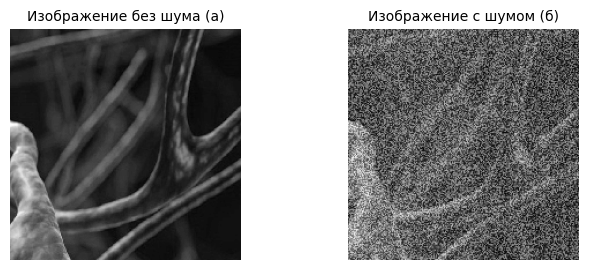

In [12]:
# Визуализация изображения с шумом и без
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Изображение без шума (а)', size=10)
ax.imshow(img_gray, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Изображение с шумом (б)', size=10)
ax.imshow(img_gray_noise, cmap='gray')
ax.axis('off')

plt.show()

In [13]:
# cv2.imwrite('data/vessel_bad_noise.jpg' , img_gray_noise)

### Использование линейного фильтра

<div align='justify'>
Существует множество различных видов фильтрации. Рассмотрим наиболее распространённые из них. Остановимся на линейной фильтрации, линейной 2D-фильтрации и box-фильтрации. При линейной фильтрации каждое значение пикселя будет умножено на скаляр g(i,j) = K*f(i,j), где K - коэффициент преобразования, а i,j - индексы конкретного пикселя на изображении. Линейная 2D-фильтрация отличается тем, что умножение происходит не для одного пикселя, а сразу для нескольких. В этом случае к части изображения применяют ядро (kernel) заданной размерностью. Последовательное смещение ядра позволяет преобразовать всё изображение. Итоговая яркость каждого пикселя в новом изображении является суммой произведений соответствующих значений пикселей исходного изображения на значения двумерного ядра свертки. На рисунке ниже представлен пример 2D-фильтрация с применением ядра размерностью 3x3.
</div>

<img width='85%' src='img/filter.jpg'>

<div align='justify'>В OpenCV 2D-фильтрация выполняется с использованием метода filter2D(). Ядро для преобразования изображения может быть заранее определено на основе квадратной матрицы. Далее рассмотрим пример применения 2D-фильтрации.</div>

In [14]:
# Ядро размерностью 3x3

kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

kernel

array([[-2, -1,  0],
       [-1,  1,  1],
       [ 0,  1,  2]])

In [15]:
# Загрузка и чтение изображения из заданной директории
img_noise = cv.imread('data/lab_1/vessel_gray_noise.jpg') 

img_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)       # Преобразование из BGR в GRAY

# Применение линейного 2D-фильтра
img_gray_2d_filter = cv.filter2D(img_noise, -1, kernel)

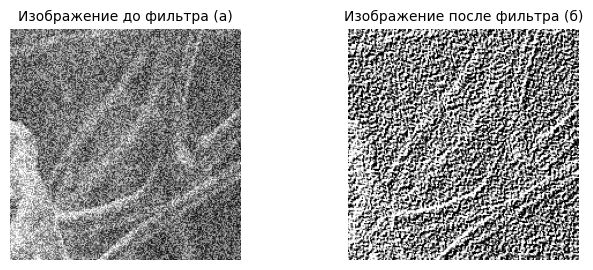

In [16]:
# Визуализация изображения до и после фильтрации
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Изображение до фильтра (а)', size=10)
ax.imshow(img_gray, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Изображение после фильтра (б)', size=10)
ax.imshow(img_gray_2d_filter, cmap='gray')
ax.axis('off')

plt.show()

### Использование box-фильтра

<div align='justify'>
Для box-фильтрации используется метод, который близок к 2D-фильтрация. Разница заключается в разных методах применения ядра. В случае box-фильтрации значение центрального пикселя будет неким усреднением окружающих его пикселей. Выполняется операция свёртки. Можно выделить несколько типов подобной фильтрации: Averaging, Gaussian и Median.</div>
<br>

<div align='justify'>
Фильтр на основе размытия (Averaging) выполняет свёртку изображения с определенным ядром. Свёртка - это процесс, при котором вычисляется новое значение пикселя с учетом значений соседних пикселей. Ядро свёртки - это квадратная матрица. Центральный пиксель этой матрицы затем становится средним значением всех других пикселей вокруг него. Чтобы выполнить размытие, нужно просто вызвать метод blur(), передав ему изображение и кортеж с размером ядра.</div>
<br>
<div align='justify'>
Размытие по Гауссу (Gaussian) похоже на обычное размытие, но вместо простого среднего значения используется взвешенное среднее. Пиксели, расположенные ближе к центральному, имеют больший "вес" при вычислении среднего. В результате изображение размывается более естественно. Для его выполнения нужно вызвать функцию GaussianBlur().</div>
<br>
<div align='justify'>
При медианном размытии (Median) центральный пиксель изображения заменяется медианой значений пикселей в пределах области ядра.  Для его выполнения нужно вызвать функцию medianBlur(), передав ей изображение и размер ядра.
</div>

<div align='justify'>
Рассмотрим применение фильтров подробнее. Будем использовать размытие с ядром 3x3, 5x5 и 10x10 пикселей. Используем метод blur().
</div>

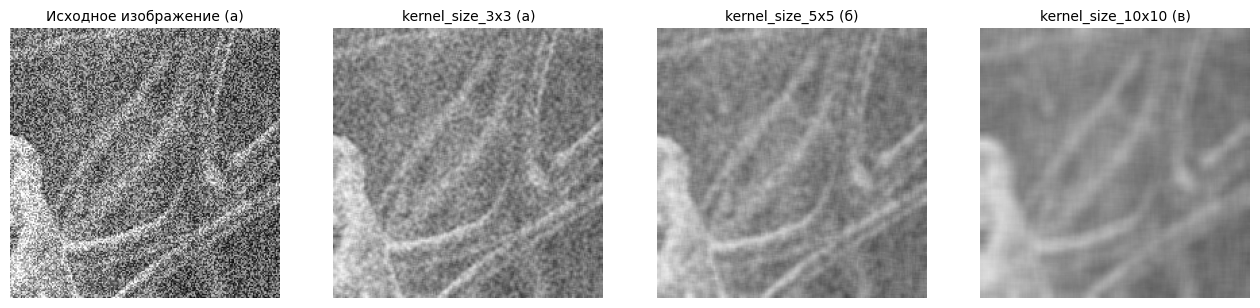

In [17]:
# Загрузка и чтение изображения из заданной директории
img = cv.imread('data/lab_1/vessel_gray_noise.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Преобразование из BGR в GRAY

# Применение линейного box-фильтра
kernel_size_3x3 = (3,3)
kernel_size_5x5 = (5,5)
kernel_size_10x10 = (10,10)

blur_3x3 = cv.blur(img, kernel_size_3x3)
blur_5x5 = cv.blur(img, kernel_size_5x5)
blur_10x10 = cv.blur(img, kernel_size_10x10)

fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 4, 1)
ax.set_title('Исходное изображение (а)', size=10)
ax.imshow(img_gray, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 4, 2)
ax.set_title('kernel_size_3x3 (а)', size=10)
ax.imshow(blur_3x3, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 4, 3)
ax.set_title('kernel_size_5x5 (б)', size=10)
ax.imshow(blur_5x5, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 4, 4)
ax.set_title('kernel_size_10x10 (в)', size=10)
ax.imshow(blur_10x10, cmap='gray')
ax.axis('off')

plt.show()

<div align='justify'>
Рекомендуется дополнительно самостоятельно изучить ещё несколько методов нелинейной фильтрации: медианного фильтра (Median filter), выравнивания гистограммы (Histogram equalization) и градиентного фильтра (Image gradients).
</div>

### Задание для самостоятельной работы.

1. Объясните основные принципы фильтрации изображений на основе математической обработки. Приведите пример (программа, реализующая алгоритм линейной фильтрации) линейной фильтрации изображения. При реализации решения не используйте стандартные методы библиотеки OpenCV.

2. Проанализируйте влияние различных методов фильтрации (2D-фильтрация и Box-фильтра) на тестовом изображении. Используйте изображение vessel_noise.jpg. Создайте собственное ядро 3x3 для линейной фильтрации изображения.

3. Проанализируйте влияние методов фильтрации (Median filter, Histogram equalization и Image gradients) на тестовом изображении. Используйте изображение vessel_noise.jpg.